In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [8]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [9]:
# reflecting an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session from Python to the DB
session = Session(engine)

In [13]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [14]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"])

id
station
date
prcp
tobs


In [15]:
columns1 = inspector.get_columns('station')
for column in columns1:
    print(column["name"])

id
station
name
latitude
longitude
elevation


In [16]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Climate Analysis

In [17]:
prcp_date = session.query(Measurement.date, Measurement.prcp).all()

In [18]:
prcp_date_dict = dict(prcp_date)

In [19]:
ordered_by_date = session.query(Measurement.date, Measurement.station).\
                  order_by(Measurement.date.desc()).all()

ordered_by_date = pd.DataFrame(ordered_by_date)
ordered_by_date.head()

,date,station
0,2017-08-23,USC00519397
1,2017-08-23,USC00514830
2,2017-08-23,USC00519523
3,2017-08-23,USC00516128
4,2017-08-22,USC00519397


In [20]:
# Designed a query that retrieves the last 12 months of precipitation data and plot the results
previous_year_data = session.query(Measurement.date, Measurement.prcp).\
                     filter(Measurement.date >= '2016-08-23').all()

# Sorted the dataframe by date
previous_year_data = pd.DataFrame(previous_year_data).sort_values('date', ascending = True).reset_index(drop=True)
# Droped null values 
previous_year_data = previous_year_data.dropna(how = 'any')

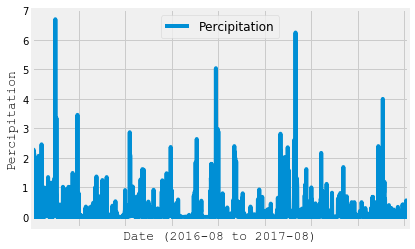

In [21]:
# Used Matplotlib to plot the data
previous_year_data.plot('date', 'prcp')
plt.xlabel('Date (2016-08 to 2017-08)', fontsize = 13, fontname = 'Courier New')
plt.ylabel('Percipitation', fontsize = 13, fontname = 'Courier New')
plt.legend(['Percipitation'], fontsize= 12,)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 

In [22]:
# Used Pandas to calcualte the summary statistics for the precipitation data
previous_year_data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Designed a query to show how many stations are available in this dataset
station_count = session.query(Station).count()
print(f'There are {station_count} stations available')

There are 9 stations available


In [24]:
# Listed the stations and the counts in descending order.
stations = session.query(Measurement.station)
stations = pd.DataFrame(stations)
most_active = stations['station'].value_counts()
most_active = list((tuple(dict(most_active).items())))

print(f'Station {most_active[0][0]} had {most_active[0][1]} weather observations.')
print(f'Station {most_active[1][0]} had {most_active[1][1]} weather observations.')
print(f'Station {most_active[2][0]} had {most_active[2][1]} weather observations.')
print(f'Station {most_active[3][0]} had {most_active[3][1]} weather observations.')
print(f'Station {most_active[4][0]} had {most_active[4][1]} weather observations.')
print(f'Station {most_active[5][0]} had {most_active[5][1]} weather observations.')
print(f'Station {most_active[6][0]} had {most_active[6][1]} weather observations.')
print(f'Station {most_active[7][0]} had {most_active[7][1]} weather observations.')
print(f'Station {most_active[8][0]} had {most_active[8][1]} weather observations.')

Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [25]:
# Using the station id from the previous query to calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station
ma_station = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == 'USC00519281').all()
ma_station = pd.DataFrame(ma_station)
ma_station_max = ma_station['tobs'].max()
ma_station_min = ma_station['tobs'].min()
ma_station_avg = ma_station['tobs'].mean()

print(f'The most active station({most_active[0][0]}) had a maximum tempature of {ma_station_max}, a minimum tempature of {ma_station_min}, and an average tempature of {(round(ma_station_avg, 1))}.')

The most active station(USC00519281) had a maximum tempature of 85.0, a minimum tempature of 54.0, and an average tempature of 71.7.


In [26]:
# Choose the station with the highest number of temperature observations to 
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

previous_year_data_ma = session.query(Measurement.date, Measurement.station, Measurement.tobs).\
                        filter(Measurement.station == 'USC00519281').filter(Measurement.date > '2016-08-23').\
                        order_by(Measurement.date).all()

previous_year_data_ma = pd.DataFrame(previous_year_data_ma)

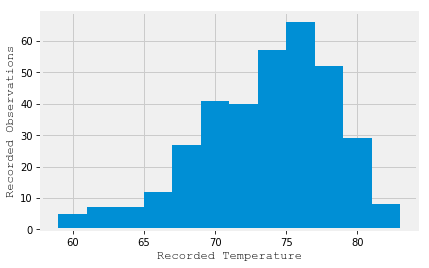

In [27]:
plt.hist(previous_year_data_ma['tobs'], 12)
plt.xlabel("Recorded Temperature", fontname= 'Courier New')
plt.ylabel("Recorded Observations", fontname = 'Courier New')
plt.tick_params(size=5)

In [28]:
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()


In [29]:
# Used  previous function `calc_temps` to calculate the tmin, tavg, and tmax 
trip_temps = calc_temps('2017-01-01','2017-02-01')
trip_temps

[(60.0, 69.63131313131314, 81.0)]

In [30]:
trip_min = trip_temps[0][0]
trip_max = trip_temps[0][1]
trip_avg = trip_temps[0][2]

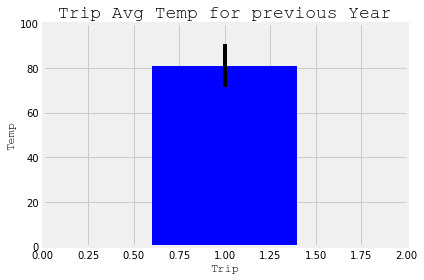

In [31]:
fig, ax = plt.subplots()
bar_chart = ax.bar(1 , trip_avg, color= 'blue', yerr= trip_temps[0][0] - trip_temps[0][1])
ax.set_xlabel("Trip", fontname = 'Courier New')
ax.set_ylabel("Temp", fontname = 'Courier New')
ax.set_title("Trip Avg Temp for previous Year", fontname = 'Courier New', fontsize = 18)

plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()


In [32]:
# Calculated the total amount of rainfall per weather station using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

rain_data = session.query(Measurement.date, Measurement.prcp, Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation).all()
rain_data = pd.DataFrame(rain_data)

In [33]:
rain_data = rain_data.sort_values(by = ['date'], ascending = False).reset_index()

In [34]:
rain_data = rain_data.set_index(['date'])

In [35]:
rain_data1 = rain_data.loc['2017-01-02':'2017-01-01'].reset_index()

In [36]:
rain_data1['station'].value_counts()

USC00519397    18
USC00513117    18
USC00516128    18
USC00519281    18
USC00514830    18
USC00519523     9
Name: station, dtype: int64

In [37]:
grouped_data = rain_data1.groupby(['station'])

In [38]:
station_rain_count = grouped_data['prcp'].sum()

In [39]:
station_rain_count1 = list((dict(station_rain_count)).items())

In [40]:
data = pd.DataFrame(station_rain_count1)
data = data.rename(columns = {0:'station', 1:'total prcp'})

In [41]:
station_data = session.query(Station.station, Station.name, Station.longitude, Station.latitude)
station_data1 = pd.DataFrame(station_data)

In [42]:
merged_d = pd.merge(data, station_data1, on = 'station')

In [43]:
merged_d

,station,total prcp,name,longitude,latitude
0,USC00513117,2.61,"KANEOHE 838.1, HI US",-157.80150,21.42340
1,USC00514830,0.09,"KUALOA RANCH HEADQUARTERS 886.9, HI US",-157.83740,21.52130
2,USC00516128,0.27,"MANOA LYON ARBO 785.2, HI US",-157.80250,21.33310
3,USC00519281,0.36,"WAIHEE 837.5, HI US",-157.84889,21.45167
4,USC00519397,0.00,"WAIKIKI 717.2, HI US",-157.81680,21.27160
5,USC00519523,0.00,"WAIMANALO EXPERIMENTAL FARM, HI US",-157.71139,21.33556
